**Goal:** Explore the dataset.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datasets import load_dataset
from setfit import SetFitModel

In [2]:
langs = ["java", "python", "pharo"]

labels = {
    "java": ["summary", "Ownership", "Expand", "usage", "Pointer", "deprecation", "rational"],
    "python": ["Usage", "Parameters", "DevelopmentNotes", "Expand", "Summary"],
    "pharo": ["Keyimplementationpoints", "Example", "Responsibilities", "Classreferences", "Intent", "Keymessages", "Collaborators"]
}

In [3]:
# Load the model, just for tokenization purposes
model = SetFitModel.from_pretrained("NLBSE/nlbse25_java")

### Load and transform the data:

In [4]:
dataset = load_dataset("NLBSE/nlbse25-code-comment-classification")

In [5]:
dataset

DatasetDict({
    java_train: Dataset({
        features: ['index', 'class', 'comment_sentence', 'partition', 'combo', 'labels'],
        num_rows: 7614
    })
    java_test: Dataset({
        features: ['index', 'class', 'comment_sentence', 'partition', 'combo', 'labels'],
        num_rows: 1725
    })
    python_train: Dataset({
        features: ['index', 'class', 'comment_sentence', 'partition', 'combo', 'labels'],
        num_rows: 1884
    })
    python_test: Dataset({
        features: ['index', 'class', 'comment_sentence', 'partition', 'combo', 'labels'],
        num_rows: 406
    })
    pharo_train: Dataset({
        features: ['index', 'class', 'comment_sentence', 'partition', 'combo', 'labels'],
        num_rows: 1298
    })
    pharo_test: Dataset({
        features: ['index', 'class', 'comment_sentence', 'partition', 'combo', 'labels'],
        num_rows: 289
    })
})

In [6]:
print("Total of comment sentences:",  sum([len(dataset[k]) for k in dataset.keys()]))

Total of comment sentences: 13216


In [7]:
java_df = []
python_df = []
pharo_df = []

lang = "java"
for s in ["train", "test"]:
	df = pd.DataFrame(dataset[f"{lang}_{s}"])
	labels_df = pd.DataFrame(df["labels"].tolist(), columns=labels[lang])
	df = pd.concat([df, labels_df], axis=1)
	java_df.append(df)
java_df = pd.concat(java_df).reset_index(drop=True)

lang = "python"
for s in ["train", "test"]:
	df = pd.DataFrame(dataset[f"{lang}_{s}"])
	labels_df = pd.DataFrame(df["labels"].tolist(), columns=labels[lang])
	df = pd.concat([df, labels_df], axis=1)
	python_df.append(df)
python_df = pd.concat(python_df).reset_index(drop=True)

lang = "pharo"
for s in ["train", "test"]:
	df = pd.DataFrame(dataset[f"{lang}_{s}"])
	labels_df = pd.DataFrame(df["labels"].tolist(), columns=labels[lang])
	df = pd.concat([df, labels_df], axis=1)
	pharo_df.append(df)
pharo_df = pd.concat(pharo_df).reset_index(drop=True)

In [8]:
java_df.sample(5)

,index,class,comment_sentence,partition,combo,labels,summary,Ownership,Expand,usage,Pointer,deprecation,rational
73,136,DiskBalancerCluster.java,not in exclusionlist is processed.,0,not in exclusionlist is processed. | DiskBalan...,"[0, 0, 1, 0, 0, 0, 0]",0,0,1,0,0,0,0
6415,9421,OutputReader.java,* Read the next key/value pair outputted by...,0,* Read the next key/value pair outputted by...,"[1, 0, 0, 0, 0, 0, 0]",1,0,0,0,0,0,0
8888,3654,BiMap.java,@link java.util.Collection,1,@link java.util.Collection | BiMap.java,"[0, 0, 0, 0, 1, 0, 0]",0,0,0,0,1,0,0
8380,3080,CLocationTab.java,// cannot work with multi cfg,1,// cannot work with multi cfg | CLocationTab.java,"[0, 0, 0, 0, 0, 0, 1]",0,0,0,0,0,0,1
3386,6236,PreemptionMessage.java,@return Specific resources that may be killed ...,0,@return Specific resources that may be killed ...,"[0, 0, 0, 1, 0, 0, 0]",0,0,0,1,0,0,0


In [9]:
python_df.sample(5)

,index,class,comment_sentence,partition,combo,labels,Usage,Parameters,DevelopmentNotes,Expand,Summary
1983,582,ConfigDict,configuration data can be nested by including ...,1,configuration data can be nested by including ...,"[0, 0, 0, 1, 0]",0,0,0,1,0
443,588,ConfigDict,", int , 0 ,",0,", int , 0 , | ConfigDict","[1, 0, 0, 0, 0]",1,0,0,0,0
1551,2184,Conv3d,"m nn^conv3d 16, 33, 3, 5, 2 , stride 2, 1, 1 ,...",0,"m nn^conv3d 16, 33, 3, 5, 2 , stride 2, 1, 1 ,...","[1, 0, 0, 0, 0]",1,0,0,0,0
2120,1430,MemcachedBytecodeCache,item should exist.,1,item should exist. | MemcachedBytecodeCache,"[1, 0, 0, 0, 0]",1,0,0,0,0
437,578,ConfigDict,if the sanity check is itself a dictionary of ...,0,if the sanity check is itself a dictionary of ...,"[0, 0, 0, 1, 0]",0,0,0,1,0


In [10]:
pharo_df.sample(5)

,index,class,comment_sentence,partition,combo,labels,Keyimplementationpoints,Example,Responsibilities,Classreferences,Intent,Keymessages,Collaborators
1355,266,BlRectangleShapeWithArrowExplanation,example blrectangleshapewitharrowexplanation #...,1,example blrectangleshapewitharrowexplanation #...,"[0, 1, 0, 0, 0, 0, 0]",0,1,0,0,0,0,0
984,1395,RTHighlightableWithCursor,b boxshape bordercolor color black.,0,b boxshape bordercolor color black. | RTHighli...,"[0, 1, 0, 0, 0, 0, 0]",0,1,0,0,0,0,0
1373,433,GtDiagrammerPicker,look brmaterialtogglelabelledlook,1,look brmaterialtogglelabelledlook | GtDiagramm...,"[0, 1, 0, 0, 0, 0, 0]",0,1,0,0,0,0,0
1149,1637,WAComboResponse,"for example, a search results page might use s...",0,"for example, a search results page might use s...","[0, 1, 0, 0, 0, 0, 0]",0,1,0,0,0,0,0
1267,1808,WAPharoUrlEncoder,i am a pharo specific url encoder.,0,i am a pharo specific url encoder. | WAPharoUr...,"[0, 0, 0, 0, 1, 0, 0]",0,0,0,0,1,0,0


In [11]:
java_df["partition"].value_counts(dropna=False)

partition
0    7614
1    1725
Name: count, dtype: int64

In [12]:
python_df["partition"].value_counts(dropna=False)

partition
0    1884
1     406
Name: count, dtype: int64

In [13]:
pharo_df["partition"].value_counts(dropna=False)

partition
0    1298
1     289
Name: count, dtype: int64

### Explore sentences length:

In [14]:
java_df["num_tokens"] = pd.Series(model.model_body.tokenizer(
    java_df["comment_sentence"].tolist(),
    add_special_tokens=False,
    return_length=True
)["length"])

python_df["num_tokens"] = pd.Series(model.model_body.tokenizer(
    python_df["comment_sentence"].tolist(),
    add_special_tokens=False,
    return_length=True
)["length"])

pharo_df["num_tokens"] = pd.Series(model.model_body.tokenizer(
    pharo_df["comment_sentence"].tolist(),
    add_special_tokens=False,
    return_length=True
)["length"])

Token indices sequence length is longer than the specified maximum sequence length for this model (140 > 128). Running this sequence through the model will result in indexing errors


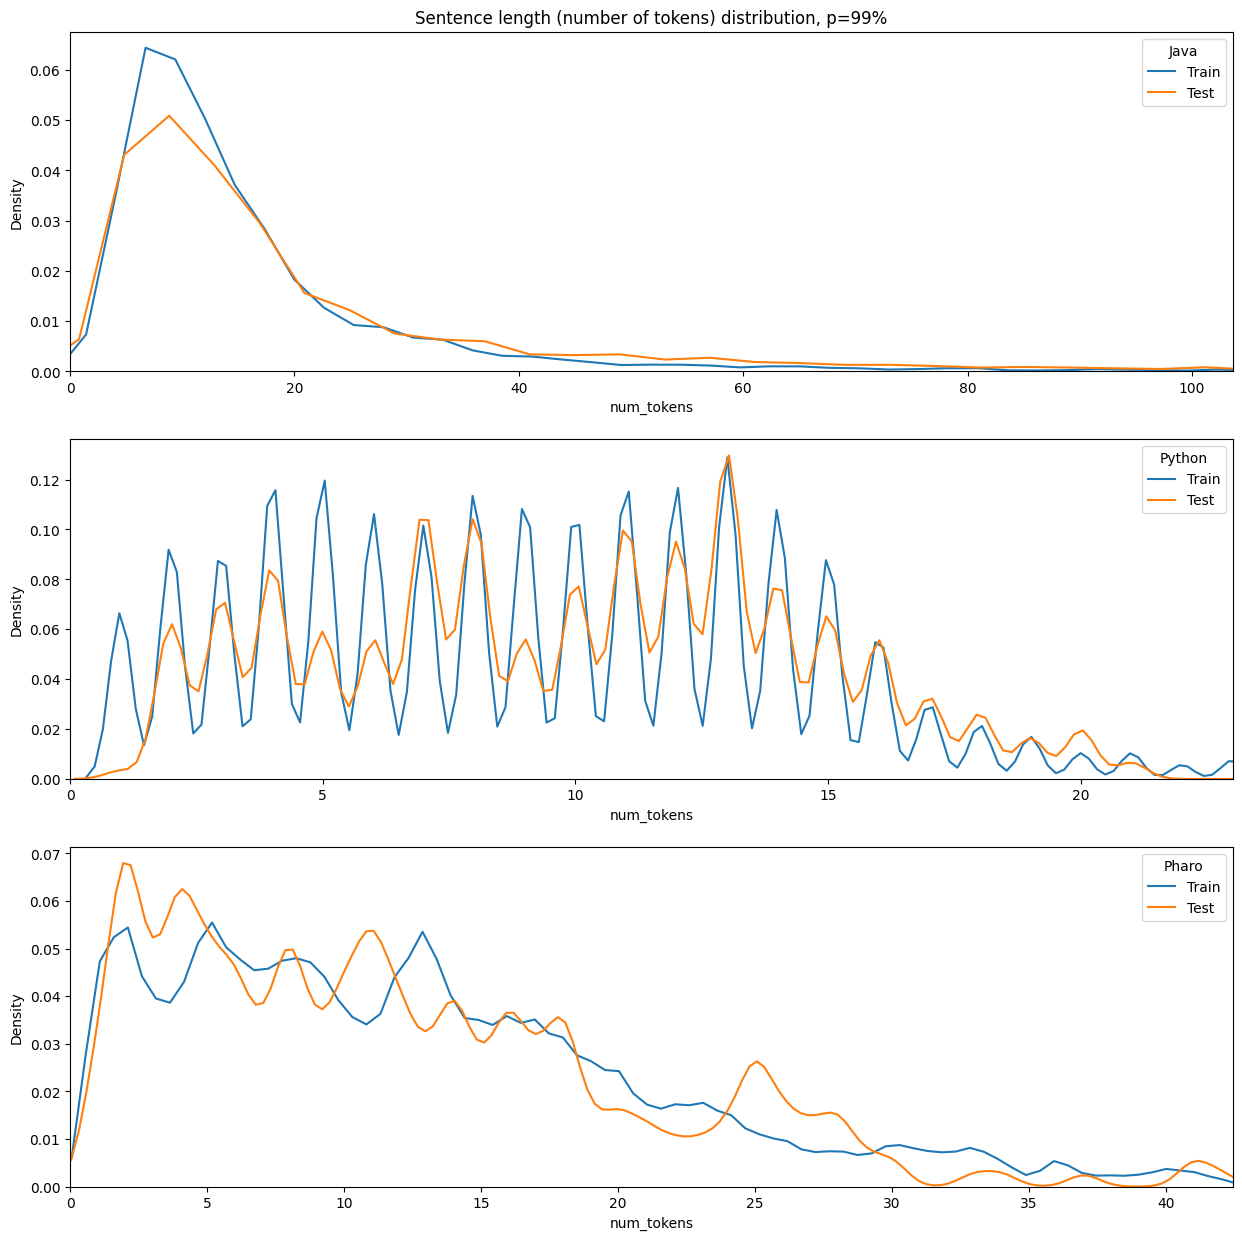

In [19]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

sns.kdeplot(java_df.loc[java_df["partition"] == 0, "num_tokens"], bw_adjust=.2, ax=axes[0])
sns.kdeplot(java_df.loc[java_df["partition"] == 1, "num_tokens"], bw_adjust=.2, ax=axes[0])
axes[0].set_xlim([0, java_df["num_tokens"].quantile(.99)])
axes[0].legend(["Train", "Test"], title="Java")

sns.kdeplot(python_df.loc[python_df["partition"] == 0, "num_tokens"], bw_adjust=.2, ax=axes[1])
sns.kdeplot(python_df.loc[python_df["partition"] == 1, "num_tokens"], bw_adjust=.2, ax=axes[1])
axes[1].set_xlim([0, python_df["num_tokens"].quantile(.99)])
axes[1].legend(["Train", "Test"], title="Python")

sns.kdeplot(pharo_df.loc[pharo_df["partition"] == 0, "num_tokens"], bw_adjust=.2, ax=axes[2])
sns.kdeplot(pharo_df.loc[pharo_df["partition"] == 1, "num_tokens"], bw_adjust=.2, ax=axes[2])
axes[2].set_xlim([0, pharo_df["num_tokens"].quantile(.99)])
axes[2].legend(["Train", "Test"], title="Pharo")

axes[0].set_title("Sentence length (number of tokens) distribution, p=99%")
plt.show()

In [21]:
java_df["num_tokens"].describe(percentiles=[.1, .25, .5, .75, .95, .99])

count    9339.000000
mean       17.732627
std        24.065105
min         1.000000
10%         5.000000
25%         8.000000
50%        12.000000
75%        19.000000
95%        50.000000
99%       103.620000
max       792.000000
Name: num_tokens, dtype: float64

In [22]:
python_df["num_tokens"].describe(percentiles=[.1, .25, .5, .75, .95, .99])

count    2290.000000
mean        9.414410
std         5.083476
min         1.000000
10%         3.000000
25%         5.000000
50%         9.000000
75%        13.000000
95%        18.000000
99%        23.000000
max        34.000000
Name: num_tokens, dtype: float64

In [23]:
pharo_df["num_tokens"].describe(percentiles=[.1, .25, .5, .75, .95, .99])

count    1587.000000
mean       13.001260
std         9.946895
min         1.000000
10%         2.000000
25%         6.000000
50%        11.000000
75%        18.000000
95%        31.000000
99%        42.420000
max       100.000000
Name: num_tokens, dtype: float64

**Insight:** Some comment sentences from the three languages are extremely short in terms of their number of characters. These sentences may potentially contribute nothing to the learning process.

In [24]:
for idx, t in java_df.sample(10).iterrows():
    print("- - -")
    print(t["comment_sentence"])

- - -
@link OutputStream
- - -
@link PortletListenerNotifier}
- - -
   * @param request ApplicationMaster allocate request
- - -
     * Delete all discovered symbols for the resource
- - -
	private static final long serialVersionUID = 3976741380246681395L;
- - -
     * @return A download stream which produces the resource content
- - -
it is in charge to publish the state of the @link plan s to the underlying
- - -
these dummy targets are added to the makefile
- - -
   * @param start starting offset
- - -
	 * @since 5.5


In [25]:
for idx, t in python_df.sample(10).iterrows():
    print("- - -")
    print(t["comment_sentence"])

- - -
it observes the input tensor, after convert , quantstub
- - -
replaces a list of migration names
- - -
scale.
- - -
evil , good
- - -
rate between two boundaries with a constant frequency, as detailed in
- - -
globl ops^const 0
- - -
3
- - -
store any unstored
- - -
everything you wanted to test about sorting
- - -
class minimalclientinterface


In [26]:
for idx, t in pharo_df.sample(10).iterrows():
    print("- - -")
    print(t["comment_sentence"])

- - -
this is disabled by default.
- - -
therefore, we decide that we have reached an optimum for the left half in step two, and start processing the right half.
- - -
i am a pharo specific xml encoder.
- - -
parametertype represents the symbolic type used in parameterizable classes.
- - -
v rtview new.
- - -
self inform result printstring
- - -
fill previously created path fith linear gradient
- - -
for example, a search results page might use something like
- - -
position object
- - -
b monthshape shape b monthshapepath 150 .


**Insight:** Java sentences contain character sequences such as `//`, `/**`, `*/`, and `*`, corresponding to the Java comment styling but not contributing to the intention of the sentence. URLs are also evidenced.

### Explore the class (source of the comment sentence):

In [27]:
java_classes_train = java_df.loc[java_df["partition"] == 0, "class"].unique().tolist()
java_classes_test = java_df.loc[java_df["partition"] == 1, "class"].unique().tolist()

print("Number of source classes only in the Java train dataset:", len(java_classes_train))
print("Number of source classes only in the Java test dataset:", len(java_classes_test))
print("Number of source classes in both datasets:", len(set(java_classes_train) & set(java_classes_test)))

Number of source classes only in the Java train dataset: 867
Number of source classes only in the Java test dataset: 238
Number of source classes in both datasets: 112


In [28]:
python_classes_train = python_df.loc[python_df["partition"] == 0, "class"].unique().tolist()
python_classes_test = python_df.loc[python_df["partition"] == 1, "class"].unique().tolist()

print("Number of source classes only in the Python train dataset:", len(python_classes_train))
print("Number of source classes only in the Python test dataset:", len(python_classes_test))
print("Number of ssource classes in both datasets:", len(set(python_classes_train) & set(python_classes_test)))

Number of source classes only in the Python train dataset: 288
Number of source classes only in the Python test dataset: 123
Number of ssource classes in both datasets: 83


In [29]:
pharo_classes_train = pharo_df.loc[pharo_df["partition"] == 0, "class"].unique().tolist()
pharo_classes_test = pharo_df.loc[pharo_df["partition"] == 1, "class"].unique().tolist()

print("Number of source classes only in the Pharo train dataset:", len(pharo_classes_train))
print("Number of source classes only in the Pharo test dataset:", len(pharo_classes_test))
print("Number of source classes in both datasets:", len(set(pharo_classes_train) & set(pharo_classes_test)))

Number of source classes only in the Pharo train dataset: 282
Number of source classes only in the Pharo test dataset: 101
Number of source classes in both datasets: 78


### Explore labels:

In [30]:
java_df["num_labels"] = java_df["labels"].apply(sum)
python_df["num_labels"] = python_df["labels"].apply(sum)
pharo_df["num_labels"] = pharo_df["labels"].apply(sum)

In [31]:
java_df["num_labels"].value_counts(dropna=False, normalize=True).to_frame()

,proportion
num_labels,
1,0.979227
2,0.019167
3,0.001606


In [32]:
java_df.groupby("partition")["num_labels"].value_counts(dropna=False, normalize=True).to_frame()

proportion
partition num_labels            
0         1             0.976097
          2             0.021933
          3             0.001970
1         1             0.993043
          2             0.006957

In [33]:
python_df["num_labels"].value_counts(dropna=False, normalize=True).to_frame()

,proportion
num_labels,
1,0.919214
2,0.075983
3,0.004803


In [34]:
python_df.groupby("partition")["num_labels"].value_counts(dropna=False, normalize=True).to_frame()

proportion
partition num_labels            
0         1             0.916667
          2             0.078556
          3             0.004777
1         1             0.931034
          2             0.064039
          3             0.004926

In [35]:
pharo_df["num_labels"].value_counts(dropna=False, normalize=True).to_frame()

,proportion
num_labels,
1,0.908633
2,0.076244
3,0.013863
4,0.001260


In [36]:
pharo_df.groupby("partition")["num_labels"].value_counts(dropna=False, normalize=True).to_frame()

proportion
partition num_labels            
0         1             0.897535
          2             0.083975
          3             0.016949
          4             0.001541
1         1             0.958478
          2             0.041522

**Insight:** Sentences with multiple positive labels are not very common.

In [42]:
java_lbl_perc_df = java_df[["partition"] + labels["java"]].groupby("partition").mean()
java_lbl_perc_df

,summary,Ownership,Expand,usage,Pointer,deprecation,rational
partition,,,,,,,
0,0.474127,0.035067,0.066851,0.274888,0.118729,0.015366,0.040846
1,0.517101,0.026087,0.059130,0.249855,0.106667,0.008696,0.039420


In [43]:
python_lbl_perc_df = python_df[["partition"] + labels["python"]].groupby("partition").mean()
python_lbl_perc_df

,Usage,Parameters,DevelopmentNotes,Expand,Summary
partition,,,,,
0,0.306794,0.303609,0.111465,0.182059,0.184183
1,0.298030,0.315271,0.100985,0.157635,0.201970


In [44]:
pharo_lbl_perc_df = pharo_df[["partition"] + labels["pharo"]].groupby("partition").mean()
pharo_lbl_perc_df

,Keyimplementationpoints,Example,Responsibilities,Classreferences,Intent,Keymessages,Collaborators
partition,,,,,,,
0,0.137134,0.421418,0.188752,0.035439,0.116333,0.164869,0.058552
1,0.148789,0.411765,0.179931,0.013841,0.103806,0.148789,0.034602
